# Loading data

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt


data = pd.read_excel('20210614 Ecommerce sales.xlsx')

In [2]:
data

,Cod_cmd,Libellé produit,Vendeur,Univers,Nature,Date de commande,Montant cmd,Quantité,Prix transport,Délai transport annoncé
0,182210782,Table basse carrée detroit design industriel,Autre vendeur,Canapé Salon Séjour,Table basse,2021-01-20,244,4,6.67,10.0
1,182082437,Ours en peluche géant 150 cm brun,Autre vendeur,Enfant Bébé,Peluche,2021-01-17,28,1,9.92,10.0
2,182095765,Ours en peluche géant 100 cm blanc,Autre vendeur,Enfant Bébé,Peluche,2021-01-18,15,1,9.92,10.0
3,182615392,Lot de 4 chaises mia noires pour salle à manger,Autre vendeur,Canapé Salon Séjour,Chaise,2021-01-23,385,2,20.75,10.0
4,184222081,Meuble tv falko bois blanc et gris,Autre vendeur,Canapé Salon Séjour,Meuble tv,2021-02-11,61,1,19.08,10.0
...,...,...,...,...,...,...,...,...,...,...
525029,186997203,Lit coffre madrid 140x200 + 1 sommier ch ne bl...,Autre vendeur,Chambre Literie,Lit adulte,2021-03-29,530,1,70.83,25.0
525030,187045930,Nappe antitache ronde infroissable et 100 poly...,Autre vendeur,Décoration Textile,Linge de table,2021-03-29,15,1,0.00,3.0
525031,187019687,Good morning housse de couette pour enfants da...,Autre vendeur,Décoration Textile,Housse de couette,2021-03-29,23,1,0.00,6.0
525032,186990574,Ampoule pour four e14 25w 230v ac,Autre vendeur,Décoration Textile,Ampoule,2021-03-29,15,2,0.00,7.0


# EDA



In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525034 entries, 0 to 525033
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Cod_cmd                  525034 non-null  int64         
 1   Libellé produit          525034 non-null  object        
 2   Vendeur                  525034 non-null  object        
 3   Univers                  507347 non-null  object        
 4   Nature                   513289 non-null  object        
 5   Date de commande         525034 non-null  datetime64[ns]
 6   Montant cmd              525034 non-null  int64         
 7   Quantité                 525034 non-null  int64         
 8   Prix transport           525034 non-null  float64       
 9   Délai transport annoncé  285611 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 40.1+ MB


In [4]:
data.head()

,Cod_cmd,Libellé produit,Vendeur,Univers,Nature,Date de commande,Montant cmd,Quantité,Prix transport,Délai transport annoncé
0,182210782,Table basse carrée detroit design industriel,Autre vendeur,Canapé Salon Séjour,Table basse,2021-01-20,244,4,6.67,10.0
1,182082437,Ours en peluche géant 150 cm brun,Autre vendeur,Enfant Bébé,Peluche,2021-01-17,28,1,9.92,10.0
2,182095765,Ours en peluche géant 100 cm blanc,Autre vendeur,Enfant Bébé,Peluche,2021-01-18,15,1,9.92,10.0
3,182615392,Lot de 4 chaises mia noires pour salle à manger,Autre vendeur,Canapé Salon Séjour,Chaise,2021-01-23,385,2,20.75,10.0
4,184222081,Meuble tv falko bois blanc et gris,Autre vendeur,Canapé Salon Séjour,Meuble tv,2021-02-11,61,1,19.08,10.0


In [5]:
data.duplicated().sum()

1049

In [6]:
data = data.drop_duplicates()


In [7]:
data.duplicated().sum()

0

In [8]:
null_values = data.isnull().sum()

In [9]:
null_values

Cod_cmd                         0
Libellé produit                 0
Vendeur                         0
Univers                     17492
Nature                      11660
Date de commande                0
Montant cmd                     0
Quantité                        0
Prix transport                  0
Délai transport annoncé    238783
dtype: int64

In [ ]:
univers = data['Univers'].mode()[0]
nature = data['Nature'].mode()[0]

data['Univers'].fillna(univers, inplace=True)
data['Nature'].fillna(nature, inplace=True)

data['Délai transport annoncé'].fillna(' - ', inplace=True)

In [11]:
null_values = data.isnull().sum()

In [12]:
null_values

Cod_cmd                    0
Libellé produit            0
Vendeur                    0
Univers                    0
Nature                     0
Date de commande           0
Montant cmd                0
Quantité                   0
Prix transport             0
Délai transport annoncé    0
dtype: int64

# Global Sales Analysis

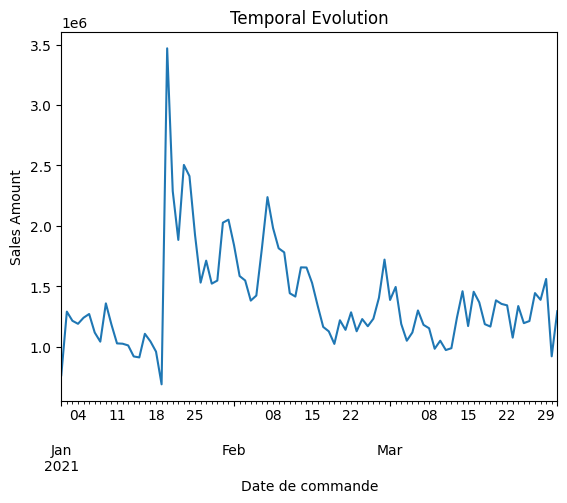

In [13]:
temporal = data.groupby('Date de commande')['Montant cmd'].sum()
plt.xlabel('Date')
plt.ylabel('Sales Amount')
temporal.plot(kind='line', title='Temporal Evolution')
plt.show()

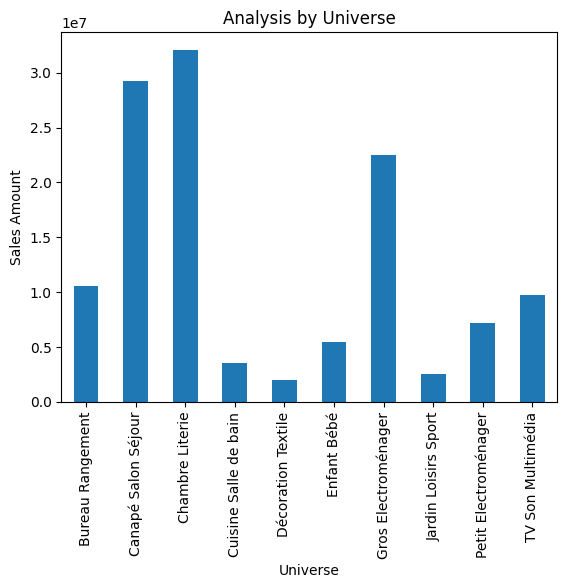

In [14]:
universe = data.groupby('Univers')['Montant cmd'].sum()
universe.plot(kind='bar', title='Analysis by Universe')
plt.xlabel('Universe')
plt.ylabel('Sales Amount')
plt.show()

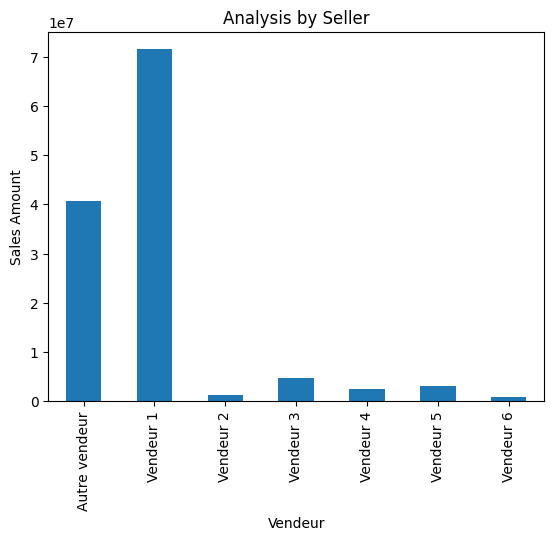

In [15]:

seller = data.groupby('Vendeur')['Montant cmd'].sum()
seller.plot(kind='bar', title='Analysis by Seller')
plt.xlabel('Vendeur')
plt.ylabel('Sales Amount')
plt.show()

In [16]:
nature = data['Nature'].value_counts()
print(nature)

Matelas                47252
Lit adulte             21119
Meuble à chaussures    19105
Chaise                 15486
Bureau                 15405
                       ...  
Ponceuse                   1
Fendeur de bûches          1
Facade de cuisine          1
Echarpe de portage         1
Lame de terrasse           1
Name: Nature, Length: 596, dtype: int64


In [17]:
unique_categories_after_recategorization = data['Nature'].unique()
print(unique_categories_after_recategorization)

['Table basse' 'Peluche' 'Chaise' 'Meuble tv' 'Meuble à chaussures'
 'Bibliotheque' 'Table' 'Bureau' 'Banc de lit' 'Panneau' 'Chevet'
 'Commode' 'Vitrine' 'Canape droit' 'Fauteuil' 'Cuisine complète'
 'Meuble bas cuisine' 'Microphone' 'Vestiaire' 'Surmatelas' 'Coffre'
 'Accessoire wc' 'Console' 'Tabouret' 'Housse de couette' 'Buffet'
 'Tente de lit' 'Structure armoire' 'Coiffeuse' 'Etagère' 'Rangement sdb'
 'Poubelle cuisine' 'Buffet de cuisine' 'Penderie' 'Porte manteau'
 'Element bas SDB' 'Petit meuble séjour' 'Rangement bureau' 'Portant'
 'Chaise de bureau' 'Pouf / repose pied' 'Miroir psyche'
 'Dressing complet' 'Fauteuil relax' 'Tete de lit' 'Aspirateur robot'
 'Acc telephonie' 'Rideau' 'Rideau de douche' 'Taie de traversin'
 'Drap housse' "Linge d'office" 'Poubelle sdb' 'Plaid' 'Voilage'
 'Panier à linge' 'Cadre photo' 'Lampe' 'Rangement a poser' 'Plafonnier'
 'Tapis salle de bain' 'Housse mobilier ext' 'Poussette' 'Colonne sdb'
 'Ensemble sdb' "Canapé d'angle" 'Housse sommier' '

In [18]:
correct_categories = data['Nature'].unique()

In [19]:
correct_categories

array(['Table basse', 'Peluche', 'Chaise', 'Meuble tv',
       'Meuble à chaussures', 'Bibliotheque', 'Table', 'Bureau',
       'Banc de lit', 'Panneau', 'Chevet', 'Commode', 'Vitrine',
       'Canape droit', 'Fauteuil', 'Cuisine complète',
       'Meuble bas cuisine', 'Microphone', 'Vestiaire', 'Surmatelas',
       'Coffre', 'Accessoire wc', 'Console', 'Tabouret',
       'Housse de couette', 'Buffet', 'Tente de lit', 'Structure armoire',
       'Coiffeuse', 'Etagère', 'Rangement sdb', 'Poubelle cuisine',
       'Buffet de cuisine', 'Penderie', 'Porte manteau',
       'Element bas SDB', 'Petit meuble séjour', 'Rangement bureau',
       'Portant', 'Chaise de bureau', 'Pouf / repose pied',
       'Miroir psyche', 'Dressing complet', 'Fauteuil relax',
       'Tete de lit', 'Aspirateur robot', 'Acc telephonie', 'Rideau',
       'Rideau de douche', 'Taie de traversin', 'Drap housse',
       "Linge d'office", 'Poubelle sdb', 'Plaid', 'Voilage',
       'Panier à linge', 'Cadre photo', 'Lampe'

In [20]:
incorrect_rows = data[~data['Nature'].isin(correct_categories)]
print("Incorrectly Categorized Rows:")
print(incorrect_rows)

Incorrectly Categorized Rows:
Empty DataFrame
Columns: [Cod_cmd, Libellé produit, Vendeur, Univers, Nature, Date de commande, Montant cmd, Quantité, Prix transport, Délai transport annoncé]
Index: []


In [21]:
#there are no rows identified as incorrectly categorized

# Dimension and Color Extraction from Product Descriptions

In [22]:
def extract_dimensions_and_colors(description):
    description = str(description)
    dimension_pattern = r'(\d+)\s*[*xX]\s*(\d*)'
    color_pattern = r'\b(blue|red|green|yellow|black|white|orange)\b'
    dimensions_match = re.search(dimension_pattern, description)

    if dimensions_match:
        dimension1 = dimensions_match.group(1)
        dimension2 = dimensions_match.group(2) if dimensions_match.group(2) else ""
        dimensions = f"{dimension1}*{dimension2}"
    else:
        dimensions = None

    colors = re.findall(color_pattern, description, flags=re.IGNORECASE)
    colors = "No color" if not colors else ", ".join(colors)

    return dimensions, colors


In [ ]:
data[['Dimensions', 'Colors']] = data['Libellé produit'].apply(lambda x: extract_dimensions_and_colors(x)).apply(pd.Series)

In [24]:
data

,Cod_cmd,Libellé produit,Vendeur,Univers,Nature,Date de commande,Montant cmd,Quantité,Prix transport,Délai transport annoncé,Dimensions,Colors
0,182210782,Table basse carrée detroit design industriel,Autre vendeur,Canapé Salon Séjour,Table basse,2021-01-20,244,4,6.67,10.0,None,No color
1,182082437,Ours en peluche géant 150 cm brun,Autre vendeur,Enfant Bébé,Peluche,2021-01-17,28,1,9.92,10.0,None,No color
2,182095765,Ours en peluche géant 100 cm blanc,Autre vendeur,Enfant Bébé,Peluche,2021-01-18,15,1,9.92,10.0,None,No color
3,182615392,Lot de 4 chaises mia noires pour salle à manger,Autre vendeur,Canapé Salon Séjour,Chaise,2021-01-23,385,2,20.75,10.0,None,No color
4,184222081,Meuble tv falko bois blanc et gris,Autre vendeur,Canapé Salon Séjour,Meuble tv,2021-02-11,61,1,19.08,10.0,None,No color
...,...,...,...,...,...,...,...,...,...,...,...,...
525029,186997203,Lit coffre madrid 140x200 + 1 sommier ch ne bl...,Autre vendeur,Chambre Literie,Lit adulte,2021-03-29,530,1,70.83,25.0,140*200,No color
525030,187045930,Nappe antitache ronde infroissable et 100 poly...,Autre vendeur,Décoration Textile,Linge de table,2021-03-29,15,1,0.00,3.0,None,No color
525031,187019687,Good morning housse de couette pour enfants da...,Autre vendeur,Décoration Textile,Housse de couette,2021-03-29,23,1,0.00,6.0,140*200,No color
525032,186990574,Ampoule pour four e14 25w 230v ac,Autre vendeur,Décoration Textile,Ampoule,2021-03-29,15,2,0.00,7.0,None,No color


In [25]:
data['Dimensions']

0            None
1            None
2            None
3            None
4            None
           ...   
525029    140*200
525030       None
525031    140*200
525032       None
525033       None
Name: Dimensions, Length: 523985, dtype: object

In [26]:
filtered_rows = data[data['Dimensions'].str.contains(r'\d', na=False, regex=True)]
print(filtered_rows)


          Cod_cmd                                    Libellé produit  \
26      182064835  Panneau décoratif universel 160x60 cm flower gris   
72      183685444  Surmatelas mousse mémoire de forme 10 zones 90...   
113     182732152  Couette bicolore gris foncé et gris 200x200 cm...   
161     182225139  Vasagle bibliothèque vintage étagère échelle à...   
166     182201787  Poubelle de recyclage poubelle double seau 2 x...   
...           ...                                                ...   
525019  211132468                        Canisse roseau naturel 1x5m   
525021  211132468  Piscine tubulaire 2 13 x 1 52 x 0 61m summer w...   
525026  211098105  Table basse wonderland table basse extensible ...   
525029  186997203  Lit coffre madrid 140x200 + 1 sommier ch ne bl...   
525031  187019687  Good morning housse de couette pour enfants da...   

              Vendeur                Univers             Nature  \
26      Autre vendeur   Jardin Loisirs Sport            Panneau   
7

# Mattress Analysis

In [27]:
mattress_data = data[data['Nature'] == 'Matelas']


In [28]:
mattress_data

,Cod_cmd,Libellé produit,Vendeur,Univers,Nature,Date de commande,Montant cmd,Quantité,Prix transport,Délai transport annoncé,Dimensions,Colors
344,181982876,Matelas Cosy 90x190cm 20 cm d épaisseur Mémoir...,Autre vendeur,Chambre Literie,Matelas,2021-01-16,157,1,0.00,12.0,90*190,No color
352,181986659,Matelas Atlanta 90x200 cm Ep 20cm Mémoire de f...,Autre vendeur,Chambre Literie,Matelas,2021-01-16,176,1,0.00,12.0,90*200,No color
385,182277093,Matelas tri technologie 140x190 cm latex+mémoi...,Autre vendeur,Chambre Literie,Matelas,2021-01-20,494,1,0.00,7.0,140*190,No color
386,182589961,Matelas tri technologie 140x190 cm latex+mémoi...,Autre vendeur,Chambre Literie,Matelas,2021-01-23,494,1,0.00,7.0,140*190,No color
387,182270271,Matelas latexlite 90x190 cm latex haute densit...,Autre vendeur,Chambre Literie,Matelas,2021-01-20,232,1,0.00,7.0,90*190,No color
...,...,...,...,...,...,...,...,...,...,...,...,...
525012,211131124,Bamboo matelas 140x190 très ferme tissu bambou...,Autre vendeur,Chambre Literie,Matelas,2021-03-31,324,1,0.00,4.0,140*190,No color
525013,187019505,Matelas ferme pour tous bz 140x190 x 15 cm + l...,Autre vendeur,Chambre Literie,Matelas,2021-03-29,629,1,0.00,4.0,140*190,No color
525015,211055605,Matelas bambou 140x190 x 23 cm très ferme noya...,Autre vendeur,Chambre Literie,Matelas,2021-03-30,324,1,0.00,4.0,140*190,No color
525016,186990238,Lot de 2 matelas 23 cm 100x200 ferme mémoire d...,Autre vendeur,Chambre Literie,Matelas,2021-03-29,865,1,0.00,4.0,100*200,No color


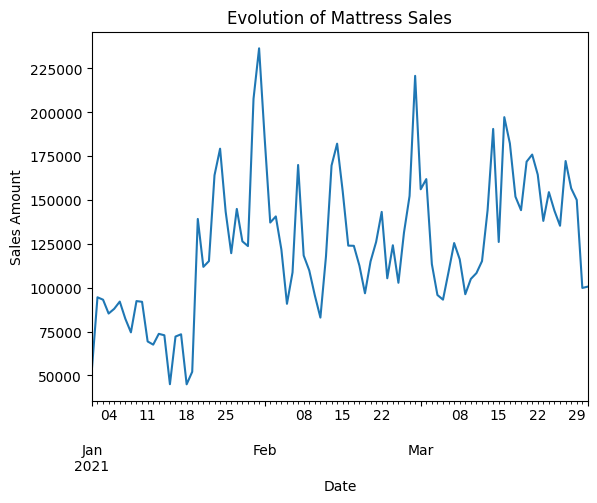

In [29]:
sales = mattress_data.groupby('Date de commande')['Montant cmd'].sum()
sales.plot(kind='line', title='Evolution of Mattress Sales')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.show()

<ipython-input-30-b273d7a94bdf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mattress_data['Month'] = mattress_data['Date de commande'].dt.month


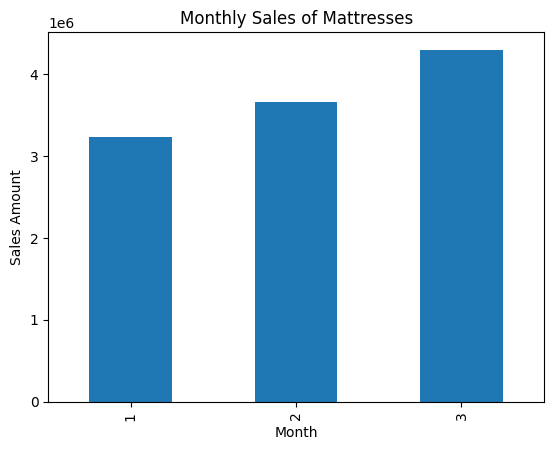

In [30]:
mattress_data['Month'] = mattress_data['Date de commande'].dt.month
monthly_sales = mattress_data.groupby('Month')['Montant cmd'].sum()
monthly_sales.plot(kind='bar', title='Monthly Sales of Mattresses')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.show()

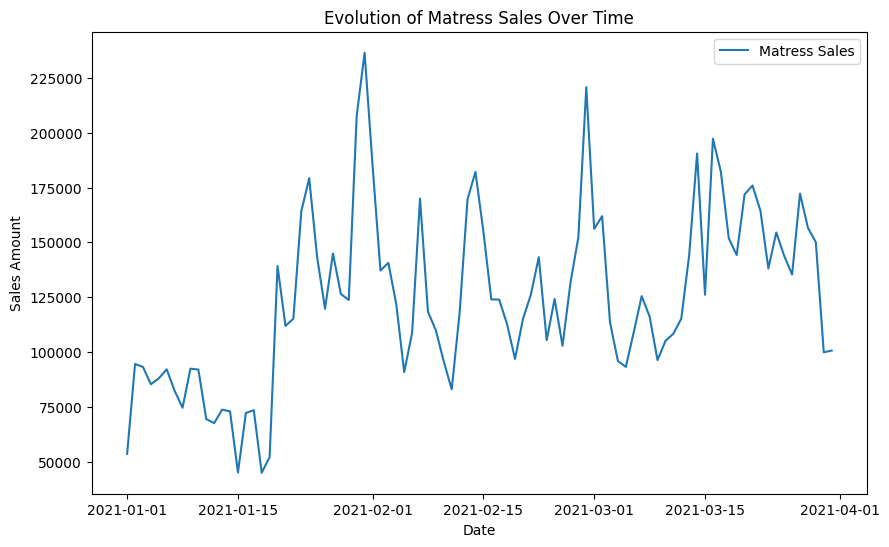

In [31]:
daily_sales = mattress_data.groupby('Date de commande')['Montant cmd'].sum()
plt.figure(figsize=(10, 6))
plt.plot(daily_sales.index, daily_sales.values, label='Matress Sales')
plt.title('Evolution of Matress Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend()
plt.show()


In [32]:
product_sales = mattress_data.groupby('Libellé produit')['Montant cmd'].sum()
highest_sales_product = product_sales.idxmax()
print(f"The product with the highest sales is: {highest_sales_product}")
highest_sales_product_data = mattress_data[mattress_data['Libellé produit'] == highest_sales_product]
daily_sales_highest_product = highest_sales_product_data.groupby('Date de commande')['Montant cmd'].sum()

The product with the highest sales is: Simpur relax matelas 140x190 real confort épaisseur 25 cm mousse à mémorie de forme visco soft double face été hiver


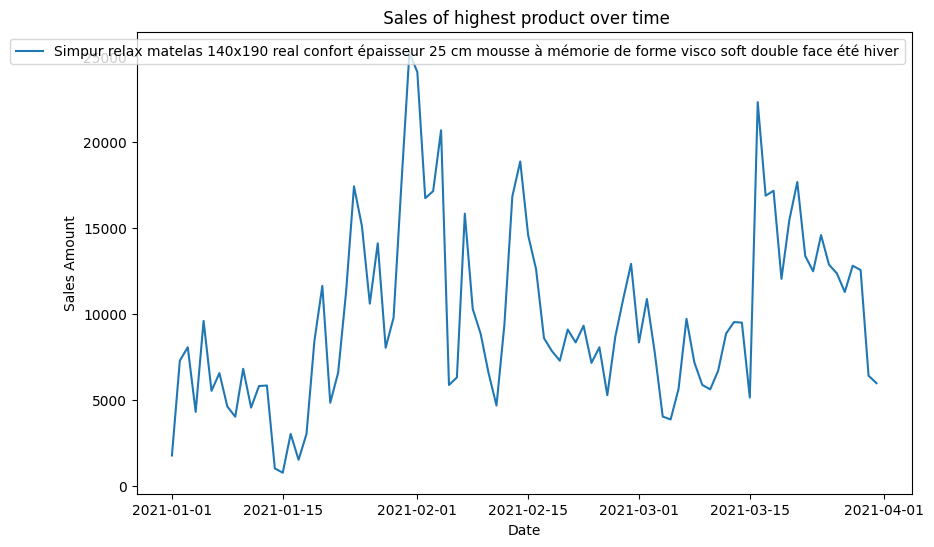

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(daily_sales_highest_product.index, daily_sales_highest_product.values, label=highest_sales_product)
plt.title(f' Sales of highest product over time')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend()
plt.show()

In [34]:
highest_sales_product_data

,Cod_cmd,Libellé produit,Vendeur,Univers,Nature,Date de commande,Montant cmd,Quantité,Prix transport,Délai transport annoncé,Dimensions,Colors,Month
2045,181862700,Simpur relax matelas 140x190 real confort épai...,Vendeur 3,Chambre Literie,Matelas,2021-01-13,251,1,0.0,14.0,140*190,No color,1
2046,181840790,Simpur relax matelas 140x190 real confort épai...,Vendeur 3,Chambre Literie,Matelas,2021-01-13,251,1,0.0,14.0,140*190,No color,1
2047,177771343,Simpur relax matelas 140x190 real confort épai...,Vendeur 3,Chambre Literie,Matelas,2021-01-13,251,1,0.0,14.0,140*190,No color,1
2048,181789763,Simpur relax matelas 140x190 real confort épai...,Vendeur 3,Chambre Literie,Matelas,2021-01-12,251,1,0.0,14.0,140*190,No color,1
2049,183725151,Simpur relax matelas 140x190 real confort épai...,Vendeur 3,Chambre Literie,Matelas,2021-02-05,251,1,0.0,10.0,140*190,No color,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362176,182206939,Simpur relax matelas 140x190 real confort épai...,Vendeur 3,Chambre Literie,Matelas,2021-01-29,251,1,0.0,-,140*190,No color,1
362177,183389270,Simpur relax matelas 140x190 real confort épai...,Vendeur 3,Chambre Literie,Matelas,2021-02-01,251,1,0.0,-,140*190,No color,2
362178,182164988,Simpur relax matelas 140x190 real confort épai...,Vendeur 3,Chambre Literie,Matelas,2021-01-19,251,1,0.0,-,140*190,No color,1
499704,183346742,Simpur relax matelas 140x190 real confort épai...,Vendeur 3,Chambre Literie,Matelas,2021-02-01,251,1,0.0,-,140*190,No color,2


In [35]:
daily_sales

Date de commande
2021-01-01     53538
2021-01-02     94545
2021-01-03     93179
2021-01-04     85287
2021-01-05     87974
               ...  
2021-03-27    172220
2021-03-28    156670
2021-03-29    150024
2021-03-30     99873
2021-03-31    100633
Name: Montant cmd, Length: 90, dtype: int64

<ipython-input-36-fe426b73e0da>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mattress_data['Mattress_Price'] = mattress_data['Montant cmd'] - mattress_data['Prix transport']


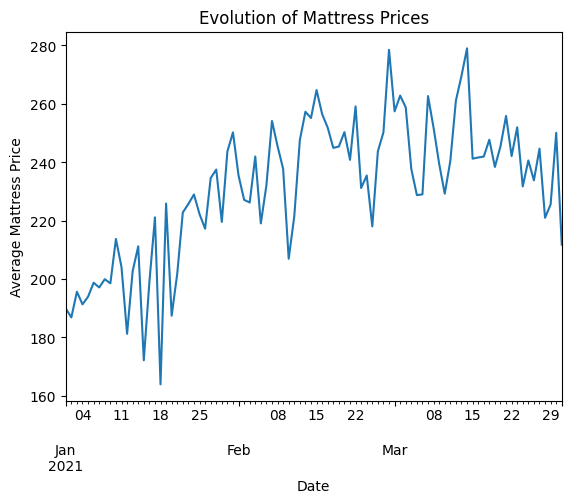

In [36]:
mattress_data = data[data['Nature'] == 'Matelas']


mattress_data['Mattress_Price'] = mattress_data['Montant cmd'] - mattress_data['Prix transport']


prices = mattress_data.groupby('Date de commande')['Mattress_Price'].mean()
prices.plot(kind='line', title='Evolution of Mattress Prices')
plt.xlabel('Date')
plt.ylabel('Average Mattress Price')
plt.show()




In [37]:
mattress_data

,Cod_cmd,Libellé produit,Vendeur,Univers,Nature,Date de commande,Montant cmd,Quantité,Prix transport,Délai transport annoncé,Dimensions,Colors,Mattress_Price
344,181982876,Matelas Cosy 90x190cm 20 cm d épaisseur Mémoir...,Autre vendeur,Chambre Literie,Matelas,2021-01-16,157,1,0.00,12.0,90*190,No color,157.00
352,181986659,Matelas Atlanta 90x200 cm Ep 20cm Mémoire de f...,Autre vendeur,Chambre Literie,Matelas,2021-01-16,176,1,0.00,12.0,90*200,No color,176.00
385,182277093,Matelas tri technologie 140x190 cm latex+mémoi...,Autre vendeur,Chambre Literie,Matelas,2021-01-20,494,1,0.00,7.0,140*190,No color,494.00
386,182589961,Matelas tri technologie 140x190 cm latex+mémoi...,Autre vendeur,Chambre Literie,Matelas,2021-01-23,494,1,0.00,7.0,140*190,No color,494.00
387,182270271,Matelas latexlite 90x190 cm latex haute densit...,Autre vendeur,Chambre Literie,Matelas,2021-01-20,232,1,0.00,7.0,90*190,No color,232.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
525012,211131124,Bamboo matelas 140x190 très ferme tissu bambou...,Autre vendeur,Chambre Literie,Matelas,2021-03-31,324,1,0.00,4.0,140*190,No color,324.00
525013,187019505,Matelas ferme pour tous bz 140x190 x 15 cm + l...,Autre vendeur,Chambre Literie,Matelas,2021-03-29,629,1,0.00,4.0,140*190,No color,629.00
525015,211055605,Matelas bambou 140x190 x 23 cm très ferme noya...,Autre vendeur,Chambre Literie,Matelas,2021-03-30,324,1,0.00,4.0,140*190,No color,324.00
525016,186990238,Lot de 2 matelas 23 cm 100x200 ferme mémoire d...,Autre vendeur,Chambre Literie,Matelas,2021-03-29,865,1,0.00,4.0,100*200,No color,865.00


In [38]:
prices

Date de commande
2021-01-01    189.872158
2021-01-02    186.848617
2021-01-03    195.639211
2021-01-04    191.314260
2021-01-05    193.942394
                 ...    
2021-03-27    244.645948
2021-03-28    220.959929
2021-03-29    225.560152
2021-03-30    250.069722
2021-03-31    211.752516
Name: Mattress_Price, Length: 90, dtype: float64